In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential 

2026-01-16 03:35:34.059773: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768534534.335935      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768534534.418399      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768534535.056782      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768534535.056879      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768534535.056885      17 computation_placer.cc:177] computation placer alr

In [2]:
X,y = make_moons(n_samples = 250, noise=0.05 , random_state=42)

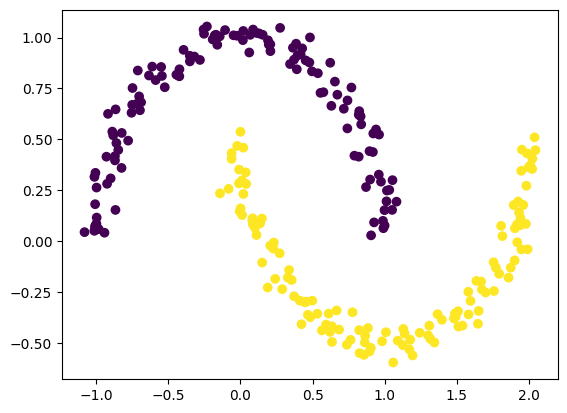

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-16 03:35:53.568969: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


with deep layers the probelm of Vanishin =g Gradients , if shallow network used , then this problem becomes manageble, but it defies the purpose od DL

In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.get_weights()[0] #for every dense layer , keras store [weight_matrix(neuron weigts = rows, input features = col) , bias_vector]

array([[-0.55482686, -0.22822502, -0.57090753,  0.44760615, -0.63872856,
         0.56926244, -0.59784055,  0.3035769 ,  0.1527648 , -0.01299304],
       [ 0.18017673,  0.57042307, -0.4372405 ,  0.51249844, -0.5426053 ,
         0.236606  , -0.0339154 , -0.5975543 ,  0.00454998,  0.66618305]],
      dtype=float32)

In [7]:
old_weights = model.get_weights()[0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
model.fit(X_train,y_train,epochs =100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5247 - loss: 0.7689
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5184 - loss: 0.7574 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5175 - loss: 0.7429 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4996 - loss: 0.7425 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5133 - loss: 0.7231 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4802 - loss: 0.7312 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4979 - loss: 0.7146 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5020 - loss: 0.7081 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5045 - loss: 0.7036 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 0.7017 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4996 - loss: 0.6994 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4985 - loss

In [10]:
new_weights = model.get_weights()[0]

In [11]:
model.optimizer.get_config()

{'name': 'adam',
 'learning_rate': 0.0010000000474974513,
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'loss_scale_factor': None,
 'gradient_accumulation_steps': None,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [12]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [13]:
gradient

array([[-11.397898 , -10.33835  ,   1.0433793, -17.457247 ,  -1.2986659,
         -1.8564461,   8.936941 ,  -8.265376 ,   8.134365 ,  -7.1586733],
       [  9.598776 ,   7.4977274,  -1.218766 ,  13.861596 ,   1.1450648,
          1.4712362,  -8.480528 ,   6.64252  ,  -5.7937684,   5.293071 ]],
      dtype=float32)

In [14]:
percent_change

array([[  2.0543163 ,   4.529894  ,   0.18275802,   3.9001355 ,
          0.20332049,   0.3261143 ,   1.4948704 ,   2.7226632 ,
          5.3247643 ,  55.09623   ],
       [  5.327423  ,   1.3144152 ,   0.2787404 ,   2.70471   ,
          0.2110309 ,   0.6218085 ,  25.00495   ,   1.1116178 ,
        127.336136  ,   0.79453707]], dtype=float32)

In [15]:
 new_weights , old_weights

(array([[-0.54342896, -0.21788667, -0.5719509 ,  0.4650634 , -0.6374299 ,
          0.5711189 , -0.6067775 ,  0.31184226,  0.14463043, -0.00583436],
        [ 0.17057796,  0.56292534, -0.43602175,  0.49863684, -0.54375035,
          0.23513477, -0.02543487, -0.60419685,  0.01034375,  0.66089   ]],
       dtype=float32),
 array([[-0.55482686, -0.22822502, -0.57090753,  0.44760615, -0.63872856,
          0.56926244, -0.59784055,  0.3035769 ,  0.1527648 , -0.01299304],
        [ 0.18017673,  0.57042307, -0.4372405 ,  0.51249844, -0.5426053 ,
          0.236606  , -0.0339154 , -0.5975543 ,  0.00454998,  0.66618305]],
       dtype=float32))

new_weightd ~= old_weights

In [16]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

ReLU alo helps with VGP

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
old_weights = model.get_weights()[0]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5251 - loss: 0.6931
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5105 - loss: 0.6926 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6560 - loss: 0.6921 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7695 - loss: 0.6915 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8034 - loss: 0.6900 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6478 - loss: 0.6881 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4886 - loss: 0.6843 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4988 - loss: 0.6789 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5358 - loss: 0.6674 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5224 - loss: 0.6547 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6447 - loss: 0.6343 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7852 - loss

In [21]:
new_weights = model.get_weights()[0]

In [22]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [23]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [24]:
gradient

array([[-102.253075,   97.40477 ,  -70.48779 ,  -70.52259 ,   -8.390769,
        -176.54573 , -254.61243 , -177.97273 ,  -86.61508 ,   66.94674 ],
       [  59.620796, -158.2477  ,   31.59955 ,  144.97824 ,  -65.57628 ,
         152.33597 ,   89.28391 ,  153.30621 ,  163.07812 , -130.73482 ]],
      dtype=float32)

In [25]:
percent_change

array([[ 46.185383 ,  20.011383 ,  13.938686 , 101.564514 ,   6.2044115,
         87.279396 ,  59.929016 ,  51.101402 ,  22.697336 ,  24.275877 ],
       [ 14.2783   , 102.407875 ,   7.894922 ,  56.74081  ,  21.55699  ,
        885.5733   ,  35.80482  ,  25.89944  ,  23.784452 ,  77.426285 ]],
      dtype=float32)

In [26]:
old_weights ,new_weights

(array([[ 0.22139704, -0.48674685,  0.505699  ,  0.06943625,  0.13523877,
          0.20227653,  0.42485672,  0.3482737 ,  0.38160902,  0.27577478],
        [ 0.4175623 ,  0.15452689, -0.4002516 ,  0.25550967,  0.30419964,
          0.01720196, -0.24936283,  0.59192866, -0.68565017,  0.16885072]],
       dtype=float32),
 array([[ 0.32365012, -0.5841516 ,  0.5761868 ,  0.13995884,  0.14362954,
          0.37882227,  0.67946917,  0.5262464 ,  0.4682241 ,  0.20882803],
        [ 0.3579415 ,  0.3127746 , -0.43185115,  0.11053142,  0.36977592,
         -0.13513401, -0.33864674,  0.43862244, -0.8487283 ,  0.29958555]],
       dtype=float32))